### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading all data

In [2]:
# Load from csv (or we could load from our pgAdmin PostgreSQL database using sqlalchemy).

df = pd.read_csv("../Resources/emissions_since1961_total_data.csv")

### Initial Exploration

In [3]:
df.head()

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
0,Australia,AUS,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,NaN,10483000,8.614547,0.151
1,Australia,AUS,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,NaN,10742000,8.852126,0.118
2,Australia,AUS,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,NaN,10950000,9.245287,-0.111
3,Australia,AUS,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,NaN,11167000,9.780775,-0.029
4,Australia,AUS,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,NaN,11388000,10.638962,0.121


In [4]:
# How many and which countries are in our dataset?

print(len(df['country'].unique()))
print(df['country'].unique())

46
['Australia' 'Austria' 'Belarus' 'Belgium' 'Brazil' 'Bulgaria' 'Canada'
 'China' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan'
 'Kazakhstan' 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta'
 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal' 'South Korea'
 'Romania' 'Russia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Turkey' 'Ukraine' 'United Kingdom' 'USA' 'Global']


In [5]:
# Are we missing data and what are the data types? 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       2806 non-null   object 
 1   country_code  2806 non-null   object 
 2   year          2806 non-null   int64  
 3   total         2806 non-null   float64
 4   coal          2777 non-null   float64
 5   oil           2777 non-null   float64
 6   gas           2777 non-null   float64
 7   cement        2776 non-null   float64
 8   flaring       2777 non-null   float64
 9   other         1530 non-null   float64
 10  population    2806 non-null   int64  
 11  per_capita    2806 non-null   float64
 12  temp_change   2385 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 285.1+ KB


In [6]:
# Get some descriptive statistics.
# It's clear that the data is right skewed with some large outlier values.

df.describe()

,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
count,2806.000000,2806.000000,2777.000000,2777.000000,2777.000000,2776.000000,2777.000000,1530.000000,2.806000e+03,2806.000000,2385.000000
mean,1991.000000,900.237980,375.246746,338.624564,153.547192,26.687746,8.738808,11.426242,1.713725e+08,8.572540,0.699425
std,17.609955,3724.128582,1545.654517,1400.580491,673.491443,135.001364,44.621170,40.111501,8.261415e+08,5.280893,0.835712
min,1961.000000,0.000000,0.000000,0.093291,0.000000,0.000000,0.000000,0.000000,1.683400e+04,0.000000,-1.796000
25%,1976.000000,28.770056,5.539509,12.526465,1.418081,0.746420,0.000000,0.464087,4.309815e+06,5.201574,0.060000
50%,1991.000000,72.585842,25.886478,34.162422,8.681269,2.014171,0.085439,1.173717,1.010999e+07,7.680242,0.662000
75%,2006.000000,349.574205,120.367379,141.796800,50.878304,7.651311,1.245688,4.444454,4.740435e+07,10.832638,1.296000
max,2021.000000,37123.850352,15051.512770,12345.653374,7921.829472,1672.592372,439.253991,306.638573,7.888409e+09,41.048885,3.693000


In [7]:
# How do our features correlate to the temp_change column?
# Almost all the correlations are low except year when looking at the whole dataset, what about a single country?

corr_matrix = df.corr(method='spearman')
np.abs(corr_matrix['temp_change']).sort_values(ascending=False)

temp_change    1.000000
year           0.731897
flaring        0.304657
gas            0.221404
other          0.179570
cement         0.096790
oil            0.075530
per_capita     0.073002
coal           0.069692
population     0.047317
total          0.023445
Name: temp_change, dtype: float64

In [8]:
# When looking at the global values the correlations are almost all very strong. 

corr_matrix = df[df['country']=='Global'].corr(method='spearman')
np.abs(corr_matrix['temp_change']).sort_values(ascending=False)

temp_change    1.000000
gas            0.924285
cement         0.924179
year           0.924047
population     0.924047
total          0.921403
oil            0.912915
coal           0.908394
other          0.786290
per_capita     0.666006
flaring        0.518172
Name: temp_change, dtype: float64

In [9]:
# When just looking at the USA, the correlations are lower but still fairly strong.

corr_matrix = df[df['country']=='USA'].corr(method='spearman')
np.abs(corr_matrix['temp_change']).sort_values(ascending=False)

temp_change    1.000000
year           0.792702
population     0.792702
gas            0.644157
total          0.637017
other          0.608689
flaring        0.588717
cement         0.524438
oil            0.479006
coal           0.407298
per_capita     0.353199
Name: temp_change, dtype: float64

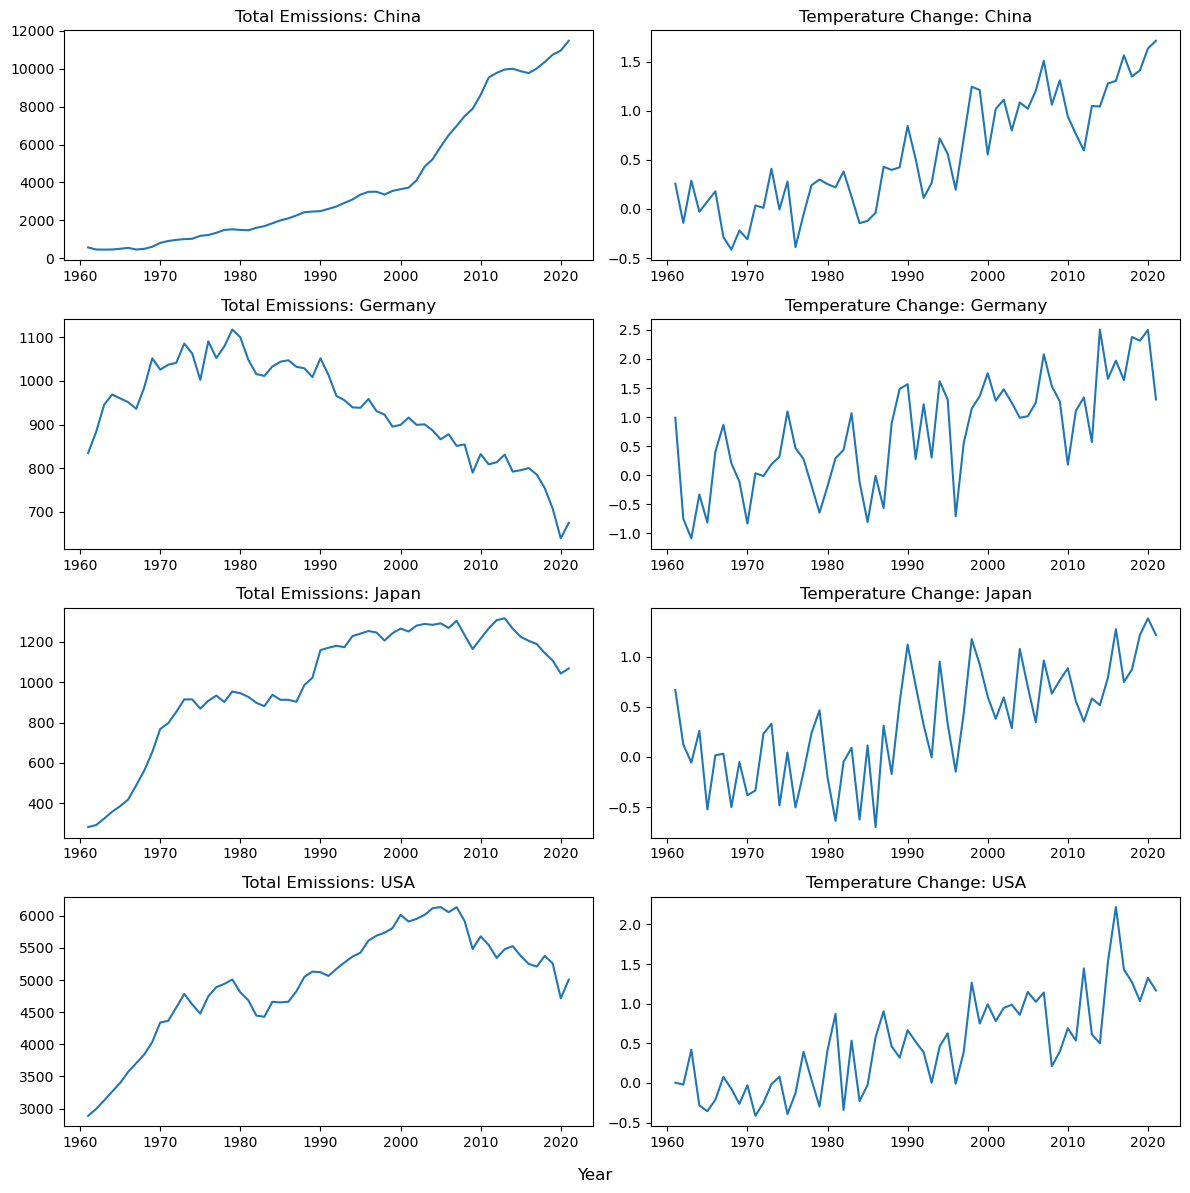

In [10]:
# Finally, let's look at plots of total emissions and temperature change vs year for a few countries. 

countries = ['China', 'Germany', 'Japan', 'USA']

fig, axs = plt.subplots(4, 2, figsize=(12, 12))

i = 0
for country in countries:
    c = df[df['country'] == country]
    axs[i,0].plot(c['year'], c['total'])
    axs[i,0].set_title(f"Total Emissions: {country}")
    axs[i,1].plot(c['year'], c['temp_change'])
    axs[i,1].set_title(f"Temperature Change: {country}")
    i += 1

fig.supxlabel('Year')
plt.tight_layout()
plt.show()

### Initial Exploration Notes
    1. Country and county_code refer to the same thing.
    2. Country is a categorical variable so we will need to encode it to be numerical.
        - Once this is done we can drop both country and country_code.
    3. The coal, oil, gas, cement, flaring, other, and temp_change columns are missing values.
        - We will need to remove the rows missing temp_change values since it is our target variable.
    4. Temp_change bounces up and down (perhaps in some pattern), which will make model error higher. 
        - It also doesn't perfectly correlate to total emissions, which may make it difficult for models to fit. 

### Further Exploration

In [11]:
# Which countries are missing coal data?

df[df['coal'].isnull()]["country"].unique()

array(['Liechtenstein'], dtype=object)

In [12]:
# It appears almost all of our missing values from coal, oil, gas, cement, and flaring are from Liechtenstein.
# Because there are too many values missing in these rows, we will drop them.

df[(df['country'] == 'Liechtenstein') & df['coal'].isnull() == True]

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
1464,Liechtenstein,LIE,1961,0.0,NaN,NaN,NaN,NaN,NaN,NaN,16834,0.0,1.057
1465,Liechtenstein,LIE,1962,0.0,NaN,NaN,NaN,NaN,NaN,NaN,17221,0.0,-0.484
1466,Liechtenstein,LIE,1963,0.0,NaN,NaN,NaN,NaN,NaN,NaN,17625,0.0,-0.775
1467,Liechtenstein,LIE,1964,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18058,0.0,0.060
1468,Liechtenstein,LIE,1965,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18500,0.0,-0.834
1469,Liechtenstein,LIE,1966,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18957,0.0,0.414
1470,Liechtenstein,LIE,1967,0.0,NaN,NaN,NaN,NaN,NaN,NaN,19467,0.0,0.549
1471,Liechtenstein,LIE,1968,0.0,NaN,NaN,NaN,NaN,NaN,NaN,20011,0.0,0.018
1472,Liechtenstein,LIE,1969,0.0,NaN,NaN,NaN,NaN,NaN,NaN,20558,0.0,-0.012
1473,Liechtenstein,LIE,1970,0.0,NaN,NaN,NaN,NaN,NaN,NaN,21089,0.0,-0.550


In [13]:
# Where is the other missing value in cement?

df[df['cement'].isnull()]["country"].unique()

array(['Iceland', 'Liechtenstein'], dtype=object)

In [14]:
# The last missing value from cement is in Iceland 2021.

df[(df['country'] == 'Iceland') & (df['cement'].isnull() == True)]

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
1158,Iceland,ISL,2021,3.374964,0.667573,2.526131,0.0002,NaN,0.174873,0.006187,372520,9.113272,0.993


In [15]:
# The cement values have been 0 since 2012, so we can fill this value in as 0 too. 

df[(df['country'] == 'Iceland') & (df['year'] > 2010)]

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
1148,Iceland,ISL,2011,3.494164,0.639488,2.652413,0.000161,0.019647,0.179512,0.002943,319014,10.943442,1.026
1149,Iceland,ISL,2012,3.490870,0.658973,2.655749,0.000041,0.000000,0.172050,0.004056,320716,10.875697,0.748
1150,Iceland,ISL,2013,3.480080,0.661003,2.642490,0.000062,0.000000,0.173138,0.003387,323764,10.740192,0.776
1151,Iceland,ISL,2014,3.436352,0.625165,2.625463,0.000148,0.000000,0.182954,0.002622,327386,10.488067,1.737
1152,Iceland,ISL,2015,3.533853,0.661181,2.705333,0.000182,0.000000,0.163135,0.004022,330815,10.674359,0.494
1153,Iceland,ISL,2016,3.485184,0.660089,2.672440,0.000080,0.000000,0.148961,0.003613,335439,10.382613,1.485
1154,Iceland,ISL,2017,3.601620,0.693221,2.758626,0.000048,0.000000,0.146479,0.003247,343400,10.481037,1.770
1155,Iceland,ISL,2018,3.658953,0.715029,2.783351,0.000032,0.000000,0.156462,0.004080,352721,10.366893,0.892
1156,Iceland,ISL,2019,3.546263,0.684012,2.692315,0.000227,0.000000,0.163106,0.006603,360563,9.829598,1.396
1157,Iceland,ISL,2020,3.328876,0.667573,2.480043,0.000200,0.000000,0.174873,0.006187,366463,9.078694,0.851


In [16]:
# What about the values missing from other? 
# It seems almost every country is missing other data.

df[df['other'].isnull()]["country"].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Kazakhstan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'South Korea',
       'Romania', 'Russia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Global'],
      dtype=object)

In [17]:
# Let's look at a few and see where the values are missing.
# Missing from 1961 to 1989.

df[(df['country'] == 'Australia') & (df['other'].isnull() == True)]['year'].values

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989], dtype=int64)

In [18]:
# These are also missing from 1961 to 1989.

df[(df['country'] == 'Finland') & (df['other'].isnull() == True)]['year'].values

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989], dtype=int64)

In [19]:
# The same trend can be seen here.
# It's possible whatever the other column is measuring either didn't exist or wasn't measured yet for most countries.
# Rather than removing all of these rows, we might instead assume their values were 0 and fill them in as such.

df[(df['country'] == 'Ukraine') & (df['other'].isnull() == True)]['year'].values

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989], dtype=int64)

In [20]:
# The final missing values to look into are from temp_change.
# Lets look at which countries are missing values and how many.
# We are missing about half the target values for these countries, so it likely makes the most sense to remove them.

for country in df[df['temp_change'].isnull()]["country"].unique():
    print(country)
    print(61 - len(df[(df['country'] == country) & (df['temp_change'].isnull())]))
    print("--------------------")

Belarus
30
--------------------
Belgium
22
--------------------
Croatia
30
--------------------
Czech Republic
29
--------------------
Estonia
30
--------------------
Kazakhstan
30
--------------------
Latvia
30
--------------------
Lithuania
30
--------------------
Luxembourg
22
--------------------
Russia
30
--------------------
Slovakia
29
--------------------
Slovenia
30
--------------------
Ukraine
30
--------------------


### Data Cleaning

In [21]:
# Remove the countries that were missing about half their target values.

df_temp = df[~df['country'].isin(df[df['temp_change'].isnull()]["country"].unique())]


# Remove the rows where coal (and oil, gas, cement, and flaring) is null.

df_dropped = df_temp[df_temp['coal'].notnull()]

In [22]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 2805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       1984 non-null   object 
 1   country_code  1984 non-null   object 
 2   year          1984 non-null   int64  
 3   total         1984 non-null   float64
 4   coal          1984 non-null   float64
 5   oil           1984 non-null   float64
 6   gas           1984 non-null   float64
 7   cement        1983 non-null   float64
 8   flaring       1984 non-null   float64
 9   other         1114 non-null   float64
 10  population    1984 non-null   int64  
 11  per_capita    1984 non-null   float64
 12  temp_change   1984 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 217.0+ KB


In [23]:
# Fill in the missing values from other and cement as 0.

df_filled = df_dropped.fillna(value={'other': 0,
                                    'cement': 0})

In [24]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 2805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       1984 non-null   object 
 1   country_code  1984 non-null   object 
 2   year          1984 non-null   int64  
 3   total         1984 non-null   float64
 4   coal          1984 non-null   float64
 5   oil           1984 non-null   float64
 6   gas           1984 non-null   float64
 7   cement        1984 non-null   float64
 8   flaring       1984 non-null   float64
 9   other         1984 non-null   float64
 10  population    1984 non-null   int64  
 11  per_capita    1984 non-null   float64
 12  temp_change   1984 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 217.0+ KB


In [25]:
# Encode the countries. Because the number value matters we need the countries to be sorted in some way.
# Therefore they will be sorted by the total emissions column from 2021.

country_encoding = {}
num = 1
for country in df_filled[df_filled['year'] == 2021].sort_values(by='total')['country']:
    country_encoding[country] = num
    num += 1

In [26]:
country_encoding

{'Liechtenstein': 1,
 'Malta': 2,
 'Iceland': 3,
 'Cyprus': 4,
 'Denmark': 5,
 'New Zealand': 6,
 'Switzerland': 7,
 'Sweden': 8,
 'Ireland': 9,
 'Finland': 10,
 'Portugal': 11,
 'Norway': 12,
 'Bulgaria': 13,
 'Hungary': 14,
 'Greece': 15,
 'Austria': 16,
 'Romania': 17,
 'Netherlands': 18,
 'Spain': 19,
 'France': 20,
 'Poland': 21,
 'Italy': 22,
 'United Kingdom': 23,
 'Australia': 24,
 'Turkey': 25,
 'Brazil': 26,
 'Canada': 27,
 'South Korea': 28,
 'Germany': 29,
 'Japan': 30,
 'USA': 31,
 'China': 32,
 'Global': 33}

In [27]:
# Apply this encoding to create a new numerical column for the countries - called country_num.

df_filled['country_num'] = df_filled['country'].apply(lambda x: country_encoding[x])

In [28]:
df_filled.head()

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change,country_num
0,Australia,AUS,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,0.0,10483000,8.614547,0.151,24
1,Australia,AUS,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,0.0,10742000,8.852126,0.118,24
2,Australia,AUS,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,0.0,10950000,9.245287,-0.111,24
3,Australia,AUS,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,0.0,11167000,9.780775,-0.029,24
4,Australia,AUS,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,0.0,11388000,10.638962,0.121,24


In [29]:
# Make country_num the first column and get rid of the categorical country and country_code columns.

df_final = df_filled[['country_num', 'year', 'total', 'coal', 'oil', 
                      'gas', 'cement', 'flaring', 'other', 'population', 
                      'per_capita', 'temp_change']]

In [30]:
df_final.head()

,country_num,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
0,24,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,0.0,10483000,8.614547,0.151
1,24,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,0.0,10742000,8.852126,0.118
2,24,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,0.0,10950000,9.245287,-0.111
3,24,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,0.0,11167000,9.780775,-0.029
4,24,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,0.0,11388000,10.638962,0.121


In [31]:
# Create the training and test sets.
# Since our data is based on years we want the training set to be before 2012 and the test set since then (10 years).

X_train = df_final[df_final['year'] < 2012].drop(columns='temp_change')
X_test = df_final[df_final['year'] >= 2012].drop(columns='temp_change')
y_train = df_final[df_final['year'] < 2012]['temp_change']
y_test = df_final[df_final['year'] >= 2012]['temp_change']

### Supervised Machine Learning - Regression

In [32]:
# Scaling
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Tuning
from sklearn.model_selection import KFold, RandomizedSearchCV

# Metrics
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from math import sqrt

In [33]:
# Scale all of the data, so large values don't cover up smaller ones.

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [34]:
# Create a Linear Regression model and fit to the training data.

linear = LinearRegression()
linear.fit(X_train_scaled, y_train)


# Predict both the test and training data (for visualization purposes).

y_linear_pred = linear.predict(X_test_scaled)
y_linear_train_pred = linear.predict(X_train_scaled)

In [35]:
# Support Vector Machines and Random Forests have hyperparameters that can be tuned, let's create a function for that.

# Define the number of cross validation K-folds and create a scorer for training.

kf = KFold(n_splits=5, random_state=0, shuffle=True)
rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))
scorer = make_scorer(rmse, greater_is_better=False)


# Create the random_search function to set up the RandomizedSearchCV to perform hyperparameter tuning on each model.

def random_search(model, grid, n_iter=100):
    search = RandomizedSearchCV(model, grid, n_iter=n_iter, cv=kf, 
                                scoring=scorer, random_state=0, verbose=2)
    return search.fit(X_train_scaled, y_train)

In [51]:
# Perform the search on a Support Vector Regression model and save the best hyperparameters. 

svr_search = random_search(SVR(max_iter=10000), {"C": np.linspace(1, 100, 10),
                                                 "gamma": np.linspace(0.00001, 0.01, 10),
                                                 "epsilon": np.linspace(0.001, 1.0, 10)})

svr = svr_search.best_estimator_
print(f"\nBest Estimator: {svr}\nBest Hyperparameters: {svr_search.best_params_}")


# Predict both the test and training data (for visualization purposes).

y_svr_pred = svr.predict(X_test_scaled)
y_svr_train_pred = svr.predict(X_train_scaled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ..C=100.0, epsilon=1.0, gamma=0.0033400000000000005; total time=   0.0s
[CV] END ..C=100.0, epsilon=1.0, gamma=0.0033400000000000005; total time=   0.0s
[CV] END ..C=100.0, epsilon=1.0, gamma=0.0033400000000000005; total time=   0.0s
[CV] END ..C=100.0, epsilon=1.0, gamma=0.0033400000000000005; total time=   0.0s
[CV] END ..C=100.0, epsilon=1.0, gamma=0.0033400000000000005; total time=   0.0s
[CV] END ..................C=89.0, epsilon=0.556, gamma=0.01; total time=   0.0s
[CV] END ..................C=89.0, epsilon=0.556, gamma=0.01; total time=   0.0s
[CV] END ..................C=89.0, epsilon=0.556, gamma=0.01; total time=   0.0s
[CV] END ..................C=89.0, epsilon=0.556, gamma=0.01; total time=   0.0s
[CV] END ..................C=89.0, epsilon=0.556, gamma=0.01; total time=   0.0s
[CV] END .................C=23.0, epsilon=1.0, gamma=0.00889; total time=   0.0s
[CV] END .................C=23.0, epsilon=1.0,

C:\Users\kevkr\Anaconda3\envs\mlenv\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .C=100.0, epsilon=0.001, gamma=0.006670000000000001; total time=   0.1s
[CV] END .C=100.0, epsilon=0.001, gamma=0.006670000000000001; total time=   0.1s
[CV] END .C=100.0, epsilon=0.001, gamma=0.006670000000000001; total time=   0.1s
[CV] END ...............C=12.0, epsilon=0.778, gamma=0.00556; total time=   0.0s
[CV] END ...............C=12.0, epsilon=0.778, gamma=0.00556; total time=   0.0s
[CV] END ...............C=12.0, epsilon=0.778, gamma=0.00556; total time=   0.0s
[CV] END ...............C=12.0, epsilon=0.778, gamma=0.00556; total time=   0.0s
[CV] END ...............C=12.0, epsilon=0.778, gamma=0.00556; total time=   0.0s
[CV] END ................C=1.0, epsilon=0.112, gamma=0.00445; total time=   0.0s
[CV] END ................C=1.0, epsilon=0.112, gamma=0.00445; total time=   0.0s
[CV] END ................C=1.0, epsilon=0.112, gamma=0.00445; total time=   0.0s
[CV] END ................C=1.0, epsilon=0.112, gamma=0.00445; total time=   0.0s
[CV] END ................C=1

[CV] END ..C=34.0, epsilon=0.667, gamma=0.006670000000000001; total time=   0.0s
[CV] END ..C=34.0, epsilon=0.667, gamma=0.006670000000000001; total time=   0.0s
[CV] END ..C=34.0, epsilon=0.667, gamma=0.006670000000000001; total time=   0.0s
[CV] END ..C=34.0, epsilon=0.667, gamma=0.006670000000000001; total time=   0.0s
[CV] END ..C=34.0, epsilon=0.667, gamma=0.006670000000000001; total time=   0.0s
[CV] END ..............C=100.0, epsilon=0.112, gamma=0.00889; total time=   0.1s
[CV] END ..............C=100.0, epsilon=0.112, gamma=0.00889; total time=   0.1s
[CV] END ..............C=100.0, epsilon=0.112, gamma=0.00889; total time=   0.1s
[CV] END ..............C=100.0, epsilon=0.112, gamma=0.00889; total time=   0.1s
[CV] END ..............C=100.0, epsilon=0.112, gamma=0.00889; total time=   0.1s
[CV] END .C=23.0, epsilon=0.667, gamma=0.0077800000000000005; total time=   0.0s
[CV] END .C=23.0, epsilon=0.667, gamma=0.0077800000000000005; total time=   0.0s
[CV] END .C=23.0, epsilon=0.

C:\Users\kevkr\Anaconda3\envs\mlenv\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END ..................C=89.0, epsilon=0.112, gamma=0.01; total time=   0.1s
[CV] END .C=12.0, epsilon=0.445, gamma=0.0011200000000000001; total time=   0.0s
[CV] END .C=12.0, epsilon=0.445, gamma=0.0011200000000000001; total time=   0.0s
[CV] END .C=12.0, epsilon=0.445, gamma=0.0011200000000000001; total time=   0.0s
[CV] END .C=12.0, epsilon=0.445, gamma=0.0011200000000000001; total time=   0.0s
[CV] END .C=12.0, epsilon=0.445, gamma=0.0011200000000000001; total time=   0.0s
[CV] END ..C=34.0, epsilon=0.112, gamma=0.006670000000000001; total time=   0.0s
[CV] END ..C=34.0, epsilon=0.112, gamma=0.006670000000000001; total time=   0.0s
[CV] END ..C=34.0, epsilon=0.112, gamma=0.006670000000000001; total time=   0.0s
[CV] END ..C=34.0, epsilon=0.112, gamma=0.006670000000000001; total time=   0.0s
[CV] END ..C=34.0, epsilon=0.112, gamma=0.006670000000000001; total time=   0.0s
[CV] END .C=56.0, epsilon=0.889, gamma=0.0077800000000000005; total time=   0.0s
[CV] END .C=56.0, epsilon=0.

[CV] END .C=56.0, epsilon=0.334, gamma=0.0011200000000000001; total time=   0.0s
[CV] END .C=56.0, epsilon=0.334, gamma=0.0011200000000000001; total time=   0.0s
[CV] END .C=56.0, epsilon=0.334, gamma=0.0011200000000000001; total time=   0.0s
[CV] END .C=56.0, epsilon=0.334, gamma=0.0011200000000000001; total time=   0.0s
[CV] END ...............C=23.0, epsilon=0.556, gamma=0.00223; total time=   0.0s
[CV] END ...............C=23.0, epsilon=0.556, gamma=0.00223; total time=   0.0s
[CV] END ...............C=23.0, epsilon=0.556, gamma=0.00223; total time=   0.0s
[CV] END ...............C=23.0, epsilon=0.556, gamma=0.00223; total time=   0.0s
[CV] END ...............C=23.0, epsilon=0.556, gamma=0.00223; total time=   0.0s
[CV] END ..C=56.0, epsilon=0.778, gamma=0.006670000000000001; total time=   0.0s
[CV] END ..C=56.0, epsilon=0.778, gamma=0.006670000000000001; total time=   0.0s
[CV] END ..C=56.0, epsilon=0.778, gamma=0.006670000000000001; total time=   0.0s
[CV] END ..C=56.0, epsilon=0

C:\Users\kevkr\Anaconda3\envs\mlenv\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .................C=100.0, epsilon=0.001, gamma=0.01; total time=   0.1s


C:\Users\kevkr\Anaconda3\envs\mlenv\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


[CV] END .................C=100.0, epsilon=0.001, gamma=0.01; total time=   0.1s
[CV] END .................C=100.0, epsilon=0.001, gamma=0.01; total time=   0.1s
[CV] END .................C=100.0, epsilon=0.001, gamma=0.01; total time=   0.1s
[CV] END .................C=100.0, epsilon=0.001, gamma=0.01; total time=   0.1s
[CV] END ...C=67.0, epsilon=1.0, gamma=0.0033400000000000005; total time=   0.0s
[CV] END ...C=67.0, epsilon=1.0, gamma=0.0033400000000000005; total time=   0.0s
[CV] END ...C=67.0, epsilon=1.0, gamma=0.0033400000000000005; total time=   0.0s
[CV] END ...C=67.0, epsilon=1.0, gamma=0.0033400000000000005; total time=   0.0s
[CV] END ...C=67.0, epsilon=1.0, gamma=0.0033400000000000005; total time=   0.0s
[CV] END ..C=23.0, epsilon=0.334, gamma=0.006670000000000001; total time=   0.0s
[CV] END ..C=23.0, epsilon=0.334, gamma=0.006670000000000001; total time=   0.0s
[CV] END ..C=23.0, epsilon=0.334, gamma=0.006670000000000001; total time=   0.0s
[CV] END ..C=23.0, epsilon=0

In [36]:
# Perform the search on a Random Forest Regression model and save the best hyperparameters. 

forest_search = random_search(RandomForestRegressor(n_estimators=1000), {"max_depth": [5], # [3, 4]
                                                                         "max_features": [1.0], # [1.0, 0.7, 0.5, 0.3]
                                                                         "bootstrap": [True], # [True, False]
                                                                         "ccp_alpha": [0.0]}) # [0.01, 0.02, 0.03]

forest = forest_search.best_estimator_
print(f"\nBest Estimator: {forest}\nBest Hyperparameters: {forest_search.best_params_}")


# Predict both the test and training data (for visualization purposes).

y_forest_pred = forest.predict(X_test_scaled)
y_forest_train_pred = forest.predict(X_train_scaled)

C:\Users\kevkr\Anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, ccp_alpha=0.0, max_depth=5, max_features=1.0; total time=   3.0s
[CV] END bootstrap=True, ccp_alpha=0.0, max_depth=5, max_features=1.0; total time=   2.9s
[CV] END bootstrap=True, ccp_alpha=0.0, max_depth=5, max_features=1.0; total time=   2.9s
[CV] END bootstrap=True, ccp_alpha=0.0, max_depth=5, max_features=1.0; total time=   3.1s
[CV] END bootstrap=True, ccp_alpha=0.0, max_depth=5, max_features=1.0; total time=   2.9s

Best Estimator: RandomForestRegressor(max_depth=5, max_features=1.0, n_estimators=1000)
Best Hyperparameters: {'max_features': 1.0, 'max_depth': 5, 'ccp_alpha': 0.0, 'bootstrap': True}


In [46]:
# It appears that the Random Forest model placed too much importance on the year column
for column, feature in zip(X_train.columns, forest.feature_importances_):
    print(f"{column}: {round(feature, 3)}")

country_num: 0.011
year: 0.841
total: 0.02
coal: 0.014
oil: 0.023
gas: 0.011
cement: 0.019
flaring: 0.01
other: 0.004
population: 0.013
per_capita: 0.035


In [52]:
# Calculate the R Squared and RMSE for each model on the training and test set

models = [linear, svr, forest]

for model in models:
    model_pred = model.predict(X_train_scaled)
    model_pred_t = model.predict(X_test_scaled)
    model_r2 = r2_score(y_train, model_pred)
    model_r2_t = r2_score(y_test, model_pred_t)
    model_rmse = np.sqrt(mean_squared_error(y_train, model_pred))
    model_rmse_t = np.sqrt(mean_squared_error(y_test, model_pred_t))
    print(f"{type(model).__name__}\n\tTraining Set:\tR Squared: {round(model_r2, 3)}\tRMSE: {round(model_rmse, 3)}\
                                \n\tTest Set:\tR Squared: {round(model_r2_t, 3)}\tRMSE: {round(model_rmse_t, 3)}")

LinearRegression
	Training Set:	R Squared: 0.337	RMSE: 0.564                                
	Test Set:	R Squared: -0.116	RMSE: 0.596
SVR
	Training Set:	R Squared: 0.374	RMSE: 0.548                                
	Test Set:	R Squared: 0.041	RMSE: 0.552
RandomForestRegressor
	Training Set:	R Squared: 0.574	RMSE: 0.452                                
	Test Set:	R Squared: -0.757	RMSE: 0.747


### Visualize the Models

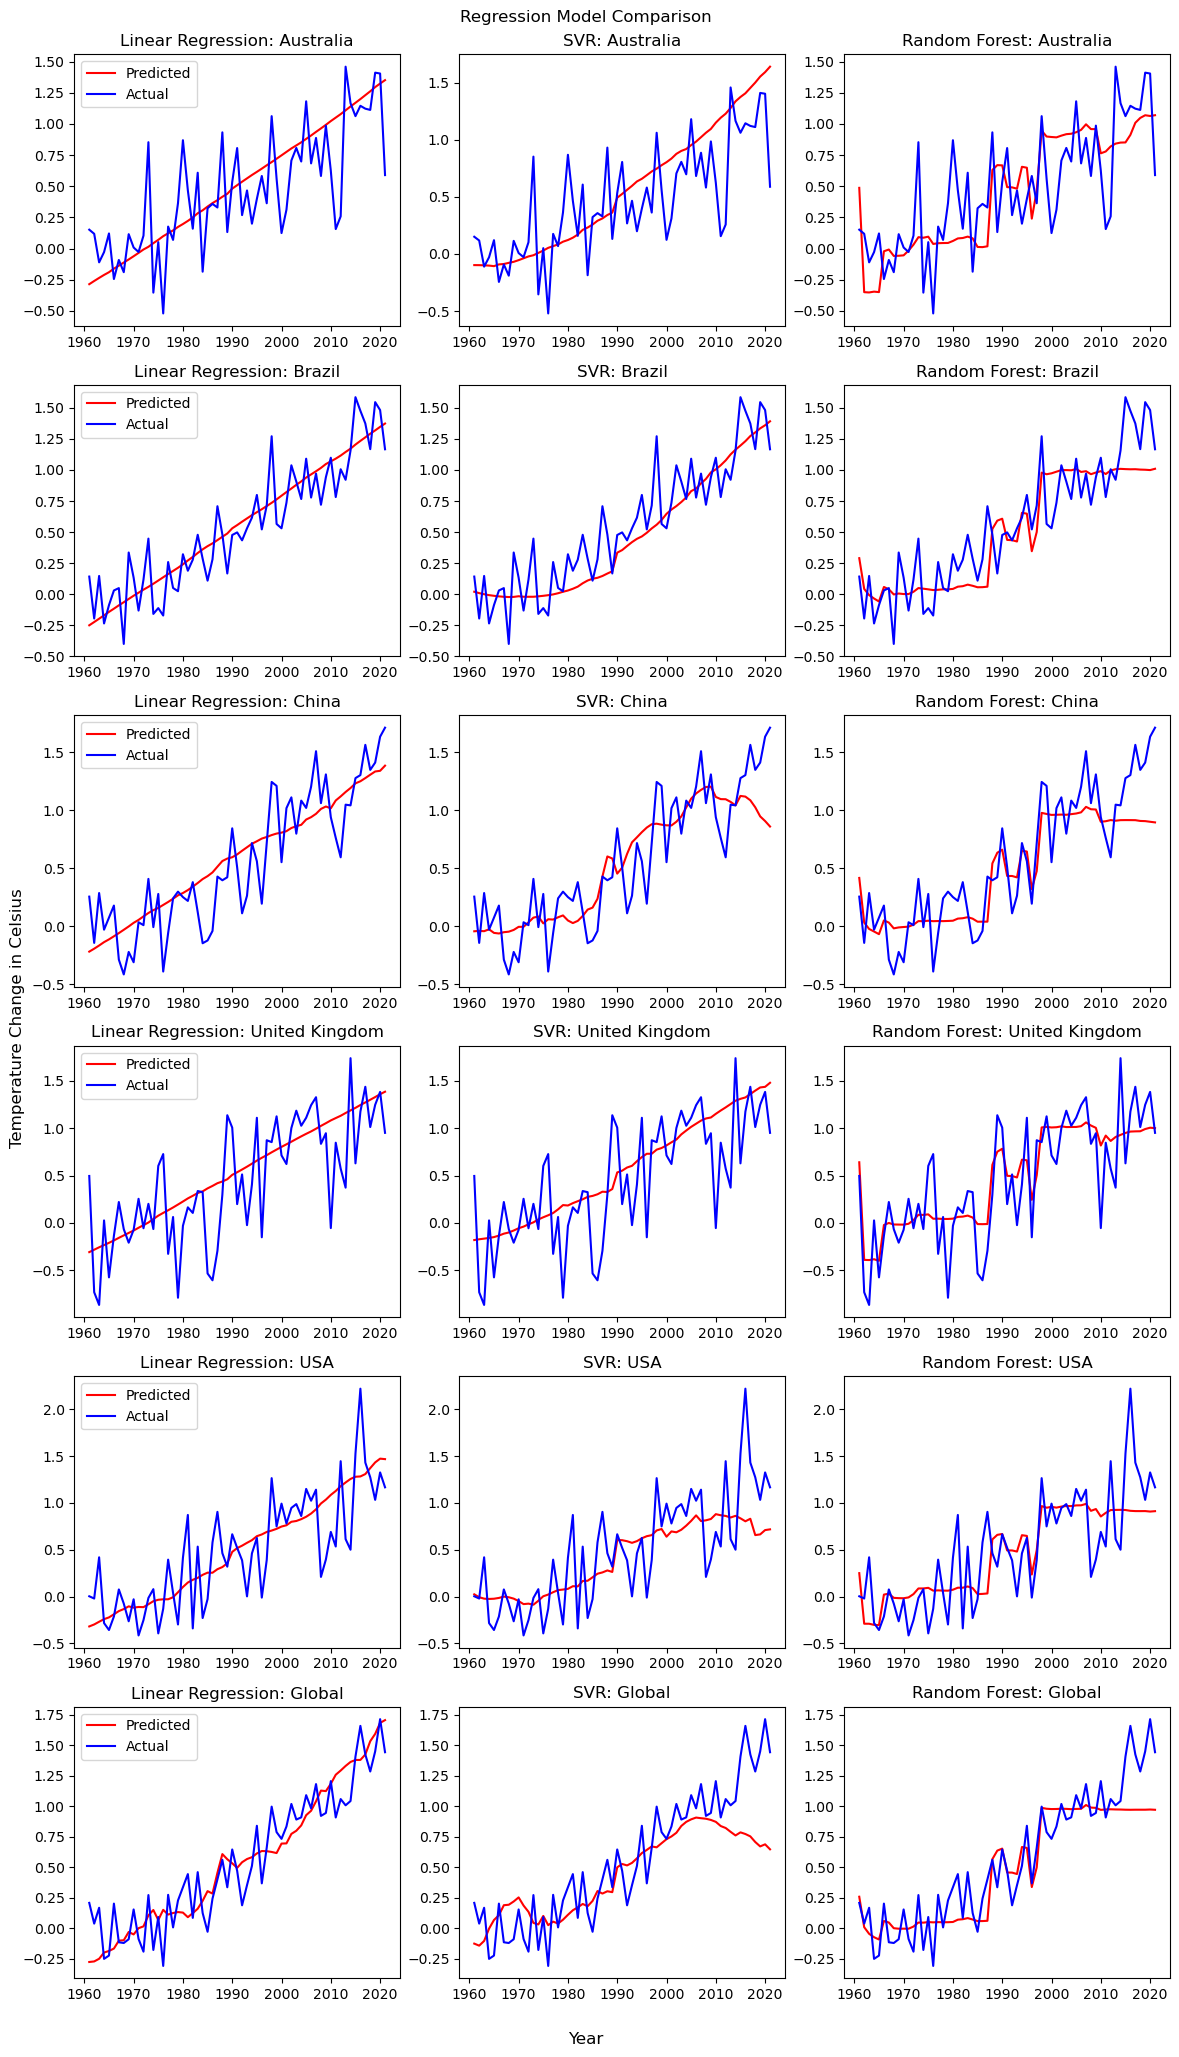

In [54]:
# Compare the predicted vs actual values for all of the regression models

indexes = {"Australia": (np.s_[:51], np.s_[:10]),
          "Brazil": (np.s_[102:153], np.s_[20:30]),
          "China": (np.s_[255:306], np.s_[50:60]),
          "United Kingdom": (np.s_[-153:-102], np.s_[-30:-20]),
          "USA": (np.s_[-102:-51], np.s_[-20:-10]),
          "Global": (np.s_[-51:], np.s_[-10:])}

fig, axs = plt.subplots(6, 3, figsize=(12, 21))

i = 0
for country in indexes:
    train_index = indexes[country][0]
    test_index = indexes[country][1]

    years = range(1961,2022)
    axs[i,0].plot(years, np.concatenate((y_linear_train_pred[train_index], y_linear_pred[test_index])), 
                  c='red', label='Predicted')
    axs[i,0].plot(years, np.concatenate((y_train[train_index], y_test[test_index])), c='blue', label='Actual')
    axs[i,0].legend()
    axs[i,0].set_title(f"Linear Regression: {country}")

    axs[i,1].plot(years, np.concatenate((y_svr_train_pred[train_index], y_svr_pred[test_index])), c='red')
    axs[i,1].plot(years, np.concatenate((y_train[train_index], y_test[test_index])), c='blue')
    axs[i,1].set_title(f"SVR: {country}")

    axs[i,2].plot(years, np.concatenate((y_forest_train_pred[train_index], y_forest_pred[test_index])), c='red')
    axs[i,2].plot(years, np.concatenate((y_train[train_index], y_test[test_index])), c='blue')
    axs[i,2].set_title(f"Random Forest: {country}")
    i += 1

fig.suptitle("Regression Model Comparison")
fig.supxlabel('Year')
fig.supylabel('Temperature Change in Celsius')
plt.tight_layout(rect=[0, 0.01, 1, 0.99])
plt.show()

### Model Notes
    1. The Linear Regression model roughly fits the data, though it may be underfitting in some instances.
    2. The Support Vector Regression model does well in some cases and very poorly in others. 
    3. The Random Forest Regression model is somewhat overfitting on the training set and doing poorly on the test set. 
        It appears that it placed too much importance on the year column. 
    
Both the Support Vector Regression and Random Forest Regression models may have needed more precise feature weighting and model tuning in order to perform better. 

## Conclusion

A basic linear regression model performed the best on our dataset across all countries. That being said, temperature changes fluctuate based on a wide variety of factors that cannot be accurately predicted by emissions or population data alone. Additionally, temperature changes are a global phenomenon. Therefore, the temperature change in any specific country cannot be accurately predicted by it's emissions or population data. If global emissions continue to increase, then temperatures in every single country will continue to increase. Therefore, if we want to stop temperature increases, there must be a global effort to reduce emissions. 